<div style="border-radius:10px;
            border:#0b0265 solid;
           background-color:#f2d9e6;
           font-size:110%;
           letter-spacing:0.5px;
            text-align: center">

<center><h1 style="padding: 25px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Cancer Patients Survival Analysis 📉⚰️</h1></center>    

</div>

# <a name="toc"></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Table of Contents</h3></center>
</div>

- [1. Problem statement](#Problem_Statement)
    - [1.1. Introduction](#Introduction)
    - [1.2. Dataset Features](#Dataset_Features)
- [2. Import Libraries and Data and Preprocessing](#Import_Libraries_and_Data)
- [3. Kaplan Meier Model](#Kaplan_Meier_Model)
- [4. Estimating Hazard Rates Using Nelson-Aalen](#Estimating_hazard_rates_using_Nelson_Aalen)
- [5. Kaplan-Meier Estimator for Gender Groups](#Kaplan_Meier_Estimator_with_groups)
- [6. Log-Rank Test](#Log_Rank_Test)
- [7. Cox Proportional Hazard Model](#Cox_proportional_hazard_model)

# <a name='Problem_Statement'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
1. Problem Statement</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

## <a name='Introduction'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px;">

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
1.1. Introduction</h3>
</div>

**What is Survival analysis?**

Survival analysis is a set of statistical approaches used to find out the time it takes for an event of interest to occur. Survival analysis is used to study the time until some event of interest (often referred to as death) occurs. Time could be measured in years, months, weeks, days, etc. The event of interest could be anything of interest. It could be an actual death, a birth, a retirement, etc.

**Applications:**

Survival analysis is used in a variety of field such as:

`Medical`: Understanding patient’s survival when diagnosed with a deadly disease, Hospital readmission duration after a major heart surgery

`Industry`: When would Tesla car battery permanently die/fail

`Transportation`: Waiting time of pedestrian after red (do-not walk) phase arrival at intersection

`E-commerce`: After seeing ads when a person would purchase the product, Time from a salesperson hire to their first sale

`Human resource`: When an employee would leave a company (churn)

**Survival time and type of events in cancer studies:**

`Survival Time`: referred to an amount of time until when a subject is alive or actively participates in a survey.

There are mainly three types of events, including:

(1) Relapse: a deterioration in someone’s state of health after a temporary improvement.

(2) Progression: the process of developing or moving gradually towards a more advanced state. (Improvement in health.)

(3) Death: the destruction or permanent end of something.

**Censoring:**

As mentioned above, survival analysis focuses on the occurrence of an event of interest (e.g., birth, death, retirement), but there is still a possibility that the event may not be observed for various reasons. Such observations are known as censored observations.

Censoring may arise in the following ways:

* A patient has not (yet) experienced the event of interest (death or relapse in our case) within the study period.
* A patient is not followed anymore.
* If a patient moves to another city, then follow-up might not be possible for the hospital staff.
This type of censoring, named right censoring, is handled in survival analysis.

There are three general types of censoring, right-censoring, left-censoring, and interval-censoring.

`Right Censoring`: The death of the person.

`Left Censoring`: The event can’t be observed for some reason. It includes events that occurred before the experiment started. (e.g., number of days from birth when the kid started walking.)

`Interval Censoring`: When we have data for some intervals only.

**Survival and hazard functions:**

We generally use two related probabilities to analyse survival data.

(1) The survival probability:

To find survival probability, we’ll be using survivor function S(t), which is the Kaplan-Meier Estimator. Survival probability is the probability that an individual (e.g., patient) survives from the time origin (e.g., diagnosis of cancer) to a specified future time t. For example, S(200) = 0.7 means that after 200 days has passed since the diagnosis of cancer, the patient’s survival probability has dropped to 0.7. If the person stays alive at the end of an experiment, then that data will be censored.

(2) The hazard probability:

The hazard probability, denoted by h(t), is the probability that an individual(e.g., patient) who is under observation at a time t has an event(e.g., death) at that time. For example, If h(200) = 0.7, then it means that the probability of that person being dead at time t=200 days is 0.7.

Note that, in contrast to the survivor function, which focuses on not having an event, the hazard function focuses on the event occurring. I think we can clearly see that higher survival probability and lower hazard probability is good for the patient.

## <a name='Dataset_Features'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px;">

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
1.2. Dataset Features</h3>
</div>

description is presented as the following:

* `inst`: Institution code
* `time`: Survival time in days
* `status`: censoring status 1 = censored, 2 = dead
* `age`: Age in years
* `sex`: Male = 1 Female = 2
* `ph.ecog`: ECOG performance score as rated by the physician. 0 = asymptomatic, 1 = symptomatic but completely ambulatory, 2 = in bed <50% of the day, 3 = in bed > 50% of the day but not bed bound, 4 = bed bound
* `ph.karno`: Karnofsky performance score (bad = 0; good = 100) rated by physician
* `pat.karno`: Karnofsky performance score as rated by patient
* `meal.cal`: Calories consumed at meals
* `wt.loss`: Weight loss in last six months

# <a name='Import_Libraries_and_Data'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
2. Import Libraries and Data and Preprocessing</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [1]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, NelsonAalenFitter, CoxPHFitter
from lifelines.statistics import logrank_test

In [3]:
data = pd.read_csv('lung.csv')

In [4]:
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [5]:
data.columns

Index(['Unnamed: 0', 'inst', 'time', 'status', 'age', 'sex', 'ph.ecog',
       'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  228 non-null    int64  
 1   inst        227 non-null    float64
 2   time        228 non-null    int64  
 3   status      228 non-null    int64  
 4   age         228 non-null    int64  
 5   sex         228 non-null    int64  
 6   ph.ecog     227 non-null    float64
 7   ph.karno    227 non-null    float64
 8   pat.karno   225 non-null    float64
 9   meal.cal    181 non-null    float64
 10  wt.loss     214 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 19.7 KB


In [7]:
data.isnull().sum()

Unnamed: 0     0
inst           1
time           0
status         0
age            0
sex            0
ph.ecog        1
ph.karno       1
pat.karno      3
meal.cal      47
wt.loss       14
dtype: int64

In [8]:
data.describe()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,228.00000,227.000000,228.000000,228.000000,228.000000,228.000000,227.000000,227.000000,225.000000,181.000000,214.000000
mean,114.50000,11.088106,305.232456,1.723684,62.447368,1.394737,0.951542,81.938326,79.955556,928.779006,9.831776
std,65.96211,8.303491,210.645543,0.448159,9.073457,0.489870,0.717872,12.327955,14.623177,402.174707,13.139902
min,1.00000,1.000000,5.000000,1.000000,39.000000,1.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,57.75000,3.000000,166.750000,1.000000,56.000000,1.000000,0.000000,75.000000,70.000000,635.000000,0.000000
50%,114.50000,11.000000,255.500000,2.000000,63.000000,1.000000,1.000000,80.000000,80.000000,975.000000,7.000000
75%,171.25000,16.000000,396.500000,2.000000,69.000000,2.000000,1.000000,90.000000,90.000000,1150.000000,15.750000
max,228.00000,33.000000,1022.000000,2.000000,82.000000,2.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


We’ll add a new column in our dataset that is called “dead”. It stores the data about whether a person that is a part of our experiment is dead or alive (based on the status value). If our status value is 1 then that person is alive, and if our status value is 2 then the person is dead.

In [9]:
data['death'] = data['status'].map({1:0, 2:1})

In [10]:
data.head(2)

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,death
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1


# <a name='Kaplan_Meier_Model'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
3. Kaplan Meier Model</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [11]:
km = KaplanMeierFitter()

Here our goal is to find the number of days a patient survived before they died. So our event of interest will be “death”, which is stored in the “dead” column. The first argument it takes is the timeline for our experiment.

In [12]:
km.fit(durations=data['time'], event_observed=data['death'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 228 total observations, 63 right-censored observations>

One most important method of kmf object is "event_table". It gives us various information for our data fitted. Let's have a look at it column-by-column.

(1) Event_at: It stores the value of the timeline for our dataset, i.e., when was the patient observed in our experiment or when was the experiment conducted. It can be the number of minutes, days, months, years etc. In our case, it's going to be the number of days. It basically stores the value of survival days for a patient.

(2) At_risk: It stores the number of current patients. At the start, it will be the total number of patients we are going to observe in our experiment. If at a certain time, new patients are added, then we have to increase it's value accordingly. Basically, we can say that:

`at_risk = current patients at_risk + entrance — removed`

(3) Entrance: It stores the value of new patients in a given timeline. It's possible that while we have other patients, some new patients are also diagnosed with cancer. That's why we add it here.

(4) Censored: Our ultimate goal is to find the survival probability for a patient. If at a specific timeline person under experiment is alive, then that person goes into the censored category. If we don't have information about when a patient died, then we add it to the censored data. Other possibilities are if a patient chooses to shift to another town where the experiment can't be conducted, then we add that patient into the censored category.

(5) Observed: The number of patients that died during the experiment.

(6) Removed: It stores the values of patients that are no longer part of our experiment. If a person died or is censored, then they fall into this category. In short,

`Removed = Observed + Censored`

In [13]:
km.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


**Calculating the probability of survival for individual timelines:**

$S_t = \frac{Number\ of\ at\ Risk\ at\ the\ Start - Number\ of\ Deaths}{Number\ of\ at\ Risk\ at\ the\ Start}$

In [14]:
event_at_0 = km.event_table.iloc[0,:]

surv_for_0 = (event_at_0.at_risk - event_at_0.observed) / event_at_0.at_risk
surv_for_0

1.0

In [15]:
event_at_5 = km.event_table.iloc[1,:]

surv_for_5 = (event_at_5.at_risk - event_at_5.observed) / event_at_5.at_risk
surv_for_5

0.9956140350877193

In [16]:
km.event_table['survival'] = (km.event_table['at_risk'] - km.event_table['observed']) / km.event_table['at_risk']

In [17]:
km.event_table

,removed,observed,censored,entrance,at_risk,survival
event_at,,,,,,
0.0,0,0,0,228,228,1.000000
5.0,1,1,0,0,228,0.995614
11.0,3,3,0,0,227,0.986784
12.0,1,1,0,0,224,0.995536
13.0,2,2,0,0,223,0.991031
...,...,...,...,...,...,...
840.0,1,0,1,0,5,1.000000
883.0,1,1,0,0,4,0.750000
965.0,1,0,1,0,3,1.000000


**Survived After Probability:**

We want to find the probability that a patient has survived through all the timeline till now. Now we need to find the actual survival probability for a patient.

Example: $S(5) = S_0 * S_5$

$S(i) =  \prod_{t=0}^i S_i$


Tthe kmf object’s predict function does all of this work for us.

In [18]:
km.predict([5,11,500,1022])

5       0.995614
11      0.982456
500     0.293269
1022    0.050346
Name: KM_estimate, dtype: float64

The kmf object’s survival_function_ gives us the complete data for our timeline.

In [19]:
km.survival_function_

,KM_estimate
timeline,
0.0,1.000000
5.0,0.995614
11.0,0.982456
12.0,0.978070
13.0,0.969298
...,...
840.0,0.067127
883.0,0.050346
965.0,0.050346


The survival probability for a patient at timeline 0 is 1. If you think it over, then you can understand that the probability that a person dies on the 1st day of diagnosis is nearly equal to 0. So we can say that the survival probability is as high as possible. As the timeline increases, the probability of survival decreases for a patient.

**Median:**

It provides the number of days where on average, 50% of patients survived.

In [20]:
km.median_survival_time_

310.0

From the above code, we can say that, on average, a person lives 310 days after the day of diagnosis.

**Find out median time to event for timeline:**

Here notice that as the number of days passed, the median survival time is decreasing.

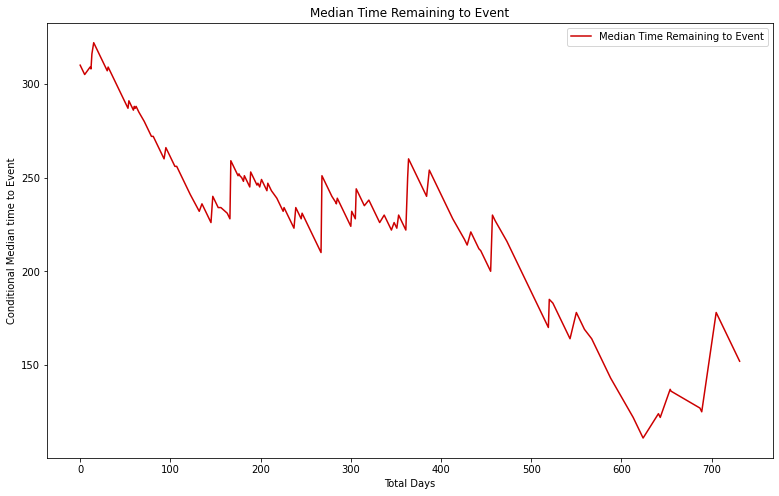

In [21]:
# represents median time of survival
median_time_to_event = km.conditional_time_to_event_
plt.figure(figsize=(13,8))
plt.plot(median_time_to_event, label = 'Median Time Remaining to Event', color = '#cc0000')
plt.title('Median Time Remaining to Event')
plt.xlabel('Total Days')
plt.ylabel('Conditional Median time to Event')
plt.legend();

**Plot the graph:**

Here we can plot the graph for survival probability.

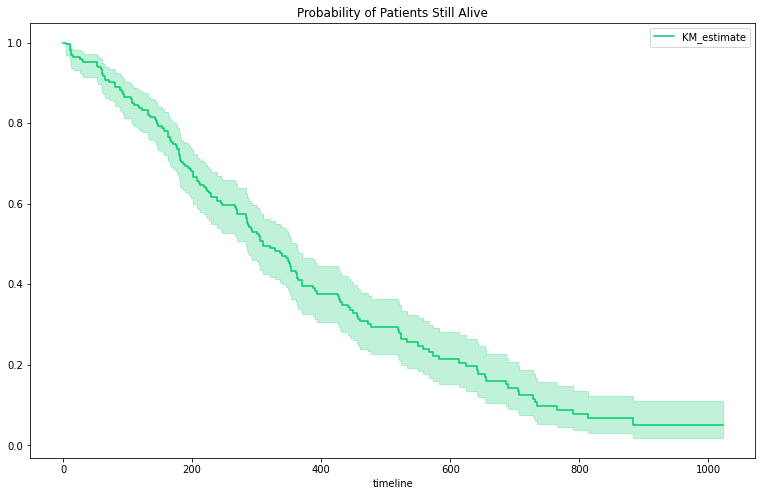

In [22]:
plt.figure(figsize=(13,8))
km.plot(color = '#00cc66')
plt.title('Kaplan-Meier Estimate')
plt.title('Probability of Patients Still Alive');

**Confidence interval:**

The confidence interval gives us the range of values we are fairly sure our true values lie in. Here you can see in the above graph the light blue color shade represents the confidence interval of survival. From that, we can say that the probability at that timeline certainly lies between that confidence interval only.

In [23]:
km.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
5.0,0.969277,0.999381
11.0,0.953935,0.993379
12.0,0.948120,0.990813
13.0,0.936682,0.985244
...,...,...
840.0,0.030728,0.123060
883.0,0.017866,0.108662
965.0,0.017866,0.108662
1010.0,0.017866,0.108662


**Probability of a person to die:**

$P_{die(t)} = \frac{Number\ of\ Deaths}{Number\ at\ Risk\ Before\ Time\ t}$

The formula for cumulative density:

$P_{die(t)} = \sum_{t \leq t_i} P_{die(t)}$

$P_{die(5)} = \frac{1}{288} = 0.004385$

In [24]:
km.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
5.0,0.004386
11.0,0.017544
12.0,0.021930
13.0,0.030702
...,...
840.0,0.932873
883.0,0.949654
965.0,0.949654


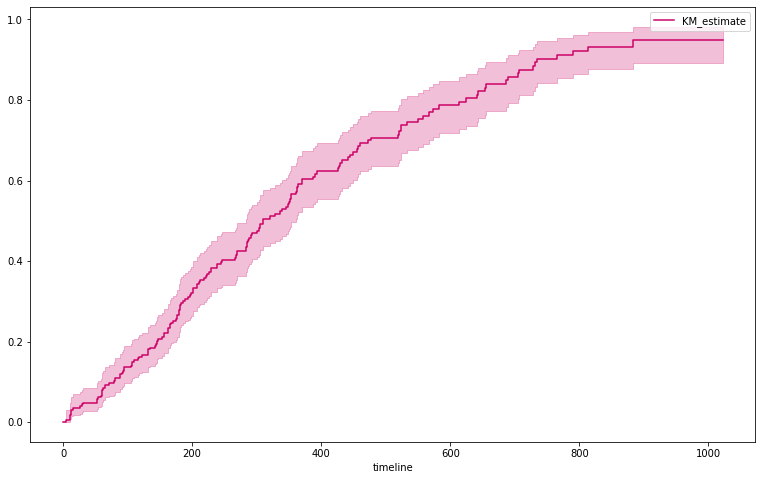

In [25]:
plt.figure(figsize=(13,8))
km.plot_cumulative_density(color = '#cc0066');

# <a name='Estimating_hazard_rates_using_Nelson_Aalen'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
4. Estimating Hazard Rates Using Nelson-Aalen</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

**Hazard function:**

The survival functions are a great way to summarize and visualize the survival dataset. However, it is not the only way. If we are curious about the hazard function $h(t)$ of a population, we, unfortunately, can't transform the Kaplan Meier estimate. For that, we use the Nelson-Aalen hazard function:

$ \widehat{H}(t) =  \sum_{t \leq t_i} \frac{d_i}{n_i}$

Where,

$d_i$ = number of deaths at time $t_i$

$n_i$ = number of patients at the start.

In [26]:
na = NelsonAalenFitter()

In [27]:
na.fit(data['time'], event_observed = data['death'])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 228 total observations, 63 right-censored observations>

$H_5 = H_0 + H_5 = \frac{0}{288} + \frac{1}{288} = 0.004385$



In [28]:
na.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
5.0,0.004386
11.0,0.017660
12.0,0.022125
13.0,0.031114
...,...
840.0,2.641565
883.0,2.891565
965.0,2.891565


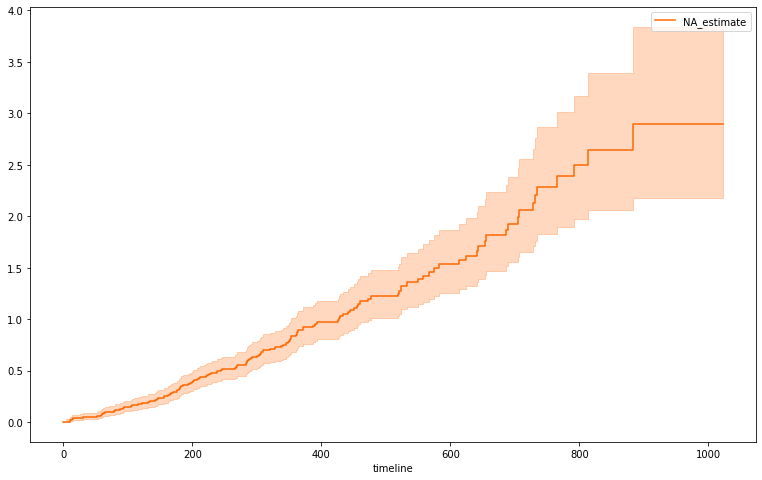

In [29]:
plt.figure(figsize=(13,8))
na.plot_cumulative_hazard(color = '#ff6600');

The cumulative hazard has less obvious understanding than the survival functions, but the hazard functions are the basis of more advanced techniques in survival analysis.

In [30]:
na.predict(1022)

2.8915648373471052

Notice that, as the number of survival days increases, the probability of a person dying increases.

# <a name='Kaplan_Meier_Estimator_with_groups'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
5. Kaplan-Meier Estimator for Gender Groups</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

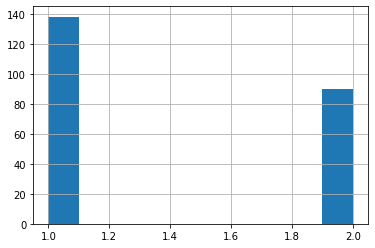

In [31]:
data['sex'].hist();

* It means that in our dataset, there are 139 males and around 90 females.

Let’s divide our data into 2 groups: Male and Female. Our goal here is to check is there any significant difference in survival rate if we divide our data set based on sex.

In [32]:
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,death
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1


In [33]:
data_male = data[data['sex'] == 1]
data_female = data[data['sex'] == 2]

In [34]:
data_male.shape, data_female.shape

((138, 12), (90, 12))

In [35]:
km_m = KaplanMeierFitter()
km_f = KaplanMeierFitter()

In [36]:
km_m.fit(durations=data_male['time'], event_observed=data_male['death'], label='Male')
km_f.fit(durations=data_female['time'], event_observed=data_female['death'], label='Female')

<lifelines.KaplanMeierFitter:"Female", fitted with 90 total observations, 37 right-censored observations>

In [37]:
km_m.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,138,138
11.0,3,3,0,0,138
12.0,1,1,0,0,135
13.0,2,2,0,0,134
15.0,1,1,0,0,132
...,...,...,...,...,...
814.0,1,1,0,0,5
840.0,1,0,1,0,4
883.0,1,1,0,0,3


In [38]:
km_f.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,90,90
5.0,1,1,0,0,90
60.0,1,1,0,0,89
61.0,1,1,0,0,88
62.0,1,1,0,0,87
...,...,...,...,...,...
735.0,1,1,0,0,5
740.0,1,0,1,0,4
765.0,1,1,0,0,3


Now we can predict the survival probability for both the groups.

In [39]:
km_m.predict(11)

0.9782608695652172

In [40]:
km_f.predict(11)

0.9888888888888887

In [41]:
km_m.predict(1022)

0.035713870293494564

In [42]:
km_f.predict(1022)

0.08321444351335816

In [43]:
km_m.survival_function_

,Male
timeline,
0.0,1.000000
11.0,0.978261
12.0,0.971014
13.0,0.956522
15.0,0.949275
...,...
814.0,0.053571
840.0,0.053571
883.0,0.035714


In [44]:
km_f.survival_function_

,Female
timeline,
0.0,1.000000
5.0,0.988889
60.0,0.977778
61.0,0.966667
62.0,0.955556
...,...
735.0,0.124822
740.0,0.124822
765.0,0.083214


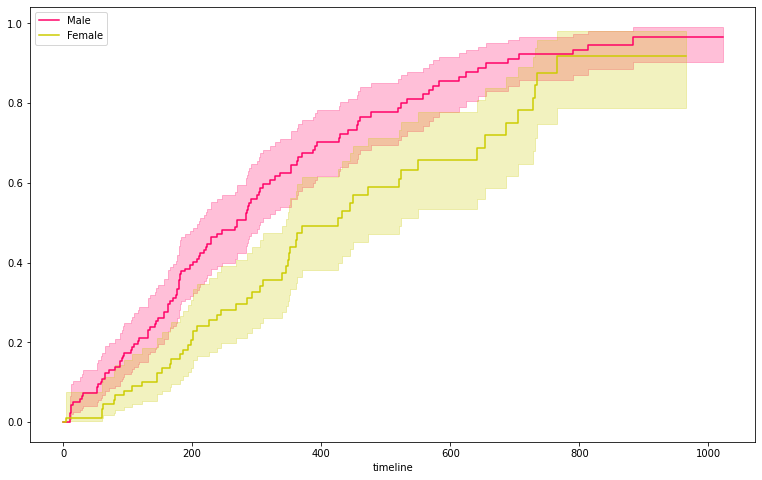

In [45]:
plt.figure(figsize=(13,8))
km_m.plot_cumulative_density(color = '#ff0066')
km_f.plot_cumulative_density(color = '#cccc00');

In [46]:
na_m = NelsonAalenFitter()
na_f = NelsonAalenFitter()

In [47]:
na_m.fit(data_male['time'], event_observed = data_male['death'])
na_f.fit(data_female['time'], event_observed = data_female['death'])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 90 total observations, 37 right-censored observations>

In [48]:
na_m.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
11.0,0.021899
12.0,0.029306
13.0,0.044287
15.0,0.051863
...,...
814.0,2.831337
840.0,2.831337
883.0,3.164670


In [49]:
na_f.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
5.0,0.011111
60.0,0.022347
61.0,0.033711
62.0,0.045205
...,...
735.0,1.988977
740.0,1.988977
765.0,2.322310


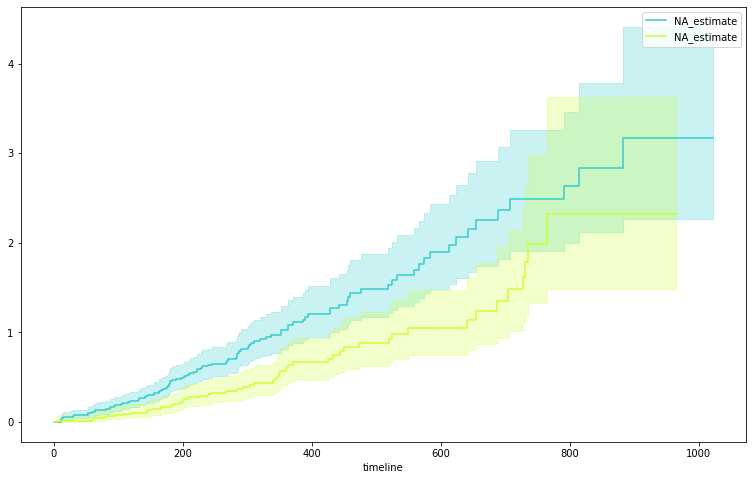

In [50]:
plt.figure(figsize=(13,8))
na_m.plot_cumulative_hazard(color = '#33cccc')
na_f.plot_cumulative_hazard(color = '#ccff33');

# <a name='Log_Rank_Test'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
6. Log-Rank Test</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

`Goal`: Here, our goal is to see if there is any significant difference between the groups being compared.

`Null Hypothesis`: The null hypothesis states that there is no significant difference between the groups being studied. If there is a significant difference between these groups, then we have to reject our null hypothesis.

How do we say that there is a significant difference?

The statistical significance is denoted by a p-value between 0 and 1. The smaller the p-value, the greater the statistical difference between groups being studied. Notice that here our goal is to find if there is any difference between the groups we are comparing. If yes, then we can do more research on why there are lower survival chances for a particular group based on various information like their diet, lifestyle, etc.

Less than (5% = 0.05) P-value means that there is a significant difference between the groups that we compared. We can partition our groups based on their sex, age, race, method of treatment, etc.

In [51]:
T1 = data_male['time']
E1 = data_male['death']

T2 = data_female['time']
E2 = data_female['death']

In [52]:
results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57

Here we’ll compare the survival distributions of two different groups by the famous statistical method of the log-rank test. Here notice that for our groups, the test_statistic equals 10.33, and the P-value indicates (<0.005), which is statistically significant and denotes that we have to reject our null hypothesis and admit that the survival function for both groups is significantly different. The P-value gives us strong evidence that “sex” was associated with survival days. In short, we can say that in our example, “sex” has a major contribution to survival days.

# <a name='Cox_proportional_hazard_model'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
7. Cox Proportional Hazard Model</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

The Cox proportional hazard model is basically a regression model generally used by medical researchers to find out the relationship between the survival time of a subject and one or more predictor variables. In short, we want to find out how different parameters like age, sex, weight, height affects the length of survival for a subject.

In the previous section, we saw Kaplan-Meier, Nelson-Aalen, and Log-Rank Test. But in that, we were only able to consider one variable at a time. And one more thing to notice here is that we were performing operations only on categorical variables like sex, status, etc., which are not generally used for non-categorical data like age, weight, etc. As a solution, we use the Cox proportional hazards regression analysis, which works for both quantitative predictor (non-categorical) variables and categorical variables.

Why do we need it?

In medical research, generally, we are considering more than one factor to diagnose a person's health or survival time, i.e., we generally make use of their sex,  age, blood pressure, and blood sugar to find out if there is any significant difference between those in different groups. For example, if we are grouping our data based on a person's age, then our goal will be to find out which age group has a higher survival chance. Is that the children's group, adult's group, or old person's group? Now what we need to find is on what basis do we make the group? To find that we use Cox regression and find the coefficients of different parameters. Let's see how that works!

Basics of the Cox proportional hazard method:

The ultimate purpose of the Cox proportional hazard method is to notice how different factors in our dataset impact the event of interest.

Hazard function:

$h(t) = h_0(t)* exp(b_1 x_1 + b_2 x_2 + ... + b_n x_n)$

where,

$t$ = survival time

$h(t)$ = hazard function

$x_1, x_2, ..., x_n$ = covariates

$b_1, b_2, ..., b_n$ = measures the impact of covariates

The values exp(bi) is called the hazard ratio (HR). The HR greater than 1 indicates that as the value of ith covariate increases, the event hazard increases, and thus the duration of survival decreases.

$HR = 1 \rightarrow No\ Effect$

$HR < 1 \rightarrow Reduction\ in\ the\ Hazard$

$HR > 1 \rightarrow Increase\ in\ the\ Hazard$

In [53]:
data_c = data[['time', 'age', 'sex', 'ph.ecog','ph.karno', 'pat.karno', 'meal.cal', 'wt.loss', 'death']]

In [54]:
data_c.isnull().sum()

time          0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
death         0
dtype: int64

In [55]:
data_c.columns

Index(['time', 'age', 'sex', 'ph.ecog', 'ph.karno', 'pat.karno', 'meal.cal',
       'wt.loss', 'death'],
      dtype='object')

In [56]:
data_c = data_c.dropna(subset=['time', 'age', 'sex', 'ph.ecog', 'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss', 'death'])

In [57]:
data_c.shape

(168, 9)

In [58]:
cph = CoxPHFitter()

cph.fit(data_c, 'time', event_col='death')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 168 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'death'
      baseline estimation = breslow
   number of observations = 168
number of events observed = 121
   partial log-likelihood = -498.75
         time fit was run = 2022-07-26 14:12:43 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.55       0.58       0.20            -0.94            -0.16                 0.39                 0.85
ph.ecog     0.73       2.08       0.22             0.30             1.17                 1.35                 3.23
ph.karno    0.02       1.02       0.01             0.00             0.04                 1.00                 1.05
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  0.92   0.36       1.48
sex           0.00 -2.74   0.01       7.36
ph.ecog       0.00  3.29 <0.005       9.95
ph.karno      0.00  2.00   0.05       4.45
pat.karno     0.00 -1.54   0.12       3.02
meal.cal      0.00  0.13   0.90       0.16
wt.loss       0.00 -1.84   0.07       3.94
---
Concordance = 0.65
Partial AIC = 1011.50
log-likelihood ratio test = 28.33 on 7 df
-log2(p) of ll-ratio test = 12.35

Here notice the p-value of different parameters as we know that a p-value (<0.05) is considered significant. Here you can see that the p-value of sex and ph.ecog are <0.05. So, we can say that we can group our data based on those parameters.

HR (Hazard Ratio) = exp(bi)

The p-value for sex is 0.01 and HR (Hazard Ratio) is 0.57 indicating a strong relationship between the patients’ sex and decreased risk of death. For example, holding the other covariates constant, being female (sex=2) reduces the hazard by a factor of 0.58, or 42%. That means that females have higher survival chances. Notice that we came to this conclusion using a graph in the previous section.

The p-value for ph.ecog is <0.005 and HR is 2.09, indicating a strong relationship between the ph.ecog value and increased risk of death. Holding the other covariates constant, a higher value of ph.ecog is associated with poor survival. Here person with higher ph.ecog value has a 109% higher risk of death. So, in short, we can say that doctors try to reduce the value of ph.ecog by providing relevant medicines.

Now notice that HR for Age is 1.01, which suggests only a 1% increase for the higher age group. So we can say that there is no significant difference between different age groups.

Check which factor affects the most from the graph:

You can clearly see that ph.ecog and sex variables have significant differences.

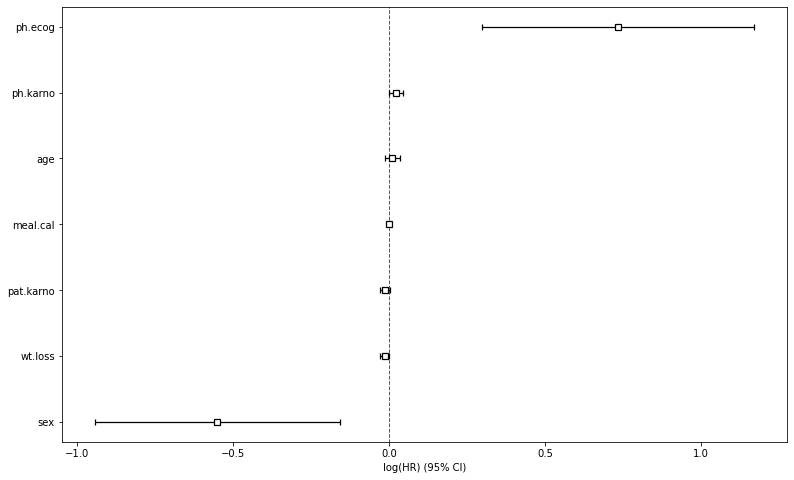

In [59]:
plt.figure(figsize=(13,8))
cph.plot();

In [60]:
cph.check_assumptions(data_c, p_value_threshold = 0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 168 total observations, 47 right-censored observations>
         test_name = proportional_hazard_test

---
                test_statistic    p  -log2(p)
age       km              1.30 0.25      1.97
          rank            0.74 0.39      1.36
meal.cal  km              4.72 0.03      5.07
          rank            4.22 0.04      4.65
pat.karno km              0.16 0.69      0.53
          rank            0.12 0.72      0.47
ph.ecog   km              0.13 0.71      0.49
          rank            0.10 0.75      0.42
ph.karno  km              3.28 0.07      3.83
          rank            2.95 0.09      3.54
sex       km              2.28 0.13      2.93
          rank            2.07 0.15      2.73
wt.loss   km              0.60 0.44      1.18
          rank            0.71 0.40      1.32



1. Variable 'meal.cal' failed the non-proportional test: p-value is 0.0298.

   Advice 1: the functional form of the variable 'meal.cal' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'meal.cal' using pd.cut, and then specify it in
`strata=['meal.cal', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#

[]

Here, we have used the plot_partial_effects_on_outcome( ) method to see how the survival varies for age group of 50, 60, 70 and 80 years old patents compared to their baseline function. It clearly highlights that young patents has higher survival probabilities at any given instance of time compared to old patients.

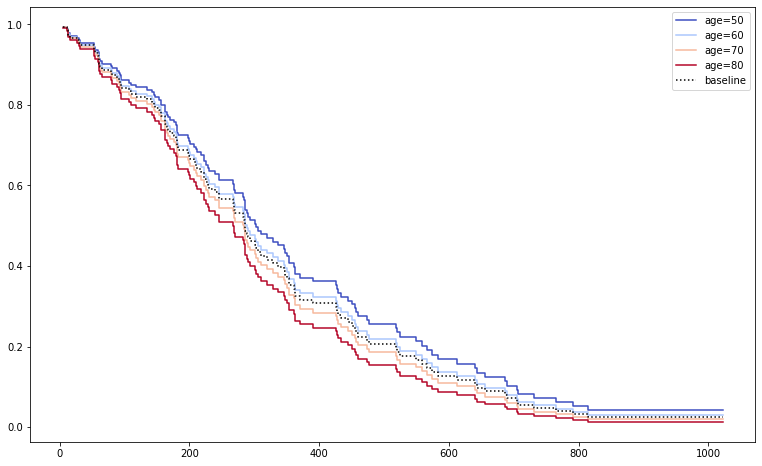

In [61]:
cph.plot_partial_effects_on_outcome(covariates = 'age', values = [50, 60, 70, 80], cmap = 'coolwarm', figsize=(13,8));

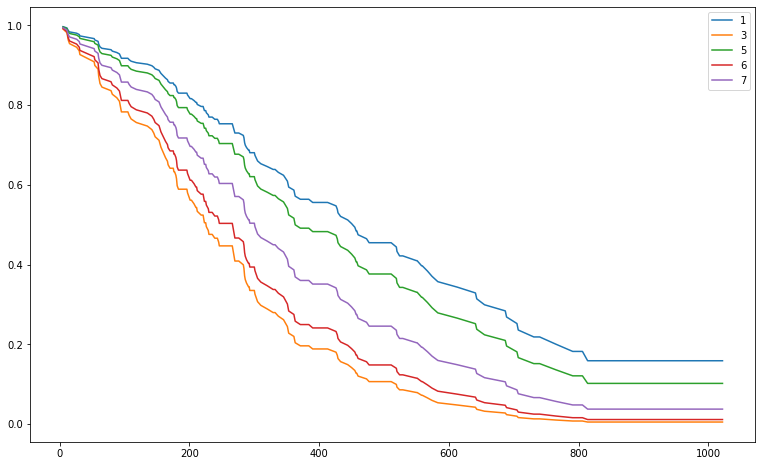

In [62]:
# Plot the survival function :
d_data = data_c.iloc[0:5,:]
cph.predict_survival_function(d_data).plot(figsize=(13,8));

Here we have plotted the survival probability for different persons in our dataset. Here notice that person-1 has the highest survival chances, and person-3 has the lowest survival chances. If you look at the main data, you can see that person-3 has a higher ph.ecog value.

Here notice that even if person-5 is alive, his/her survival probability is less since he/she has higher ph.ecog value.

In [63]:
data_c['ph.ecog'].unique()

array([0., 1., 2., 3.])

In [64]:
data_c['ph.ecog'].value_counts()

1.0    81
0.0    47
2.0    39
3.0     1
Name: ph.ecog, dtype: int64

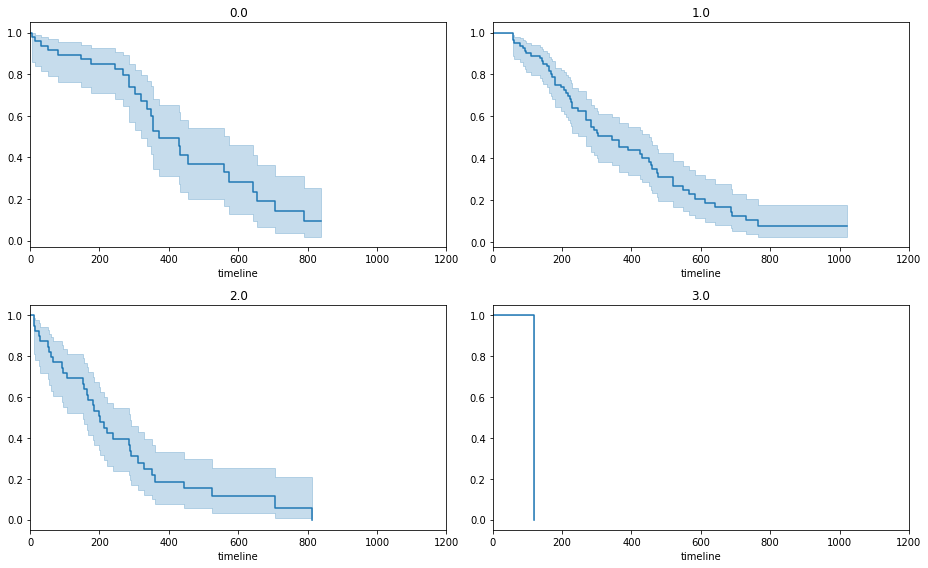

In [65]:
ecog_types = data_c.sort_values(by = ['ph.ecog'])['ph.ecog'].unique()
for i, ecog_types in enumerate(ecog_types):
  ax = plt.subplot(2, 2, i+1)
  ix = data_c['ph.ecog'] == ecog_types
  km.fit(data_c['time'][ix], data_c['death'][ix], label = ecog_types)
  km.plot_survival_function(ax = ax, legend = False, figsize=(13,8))
  plt.title(ecog_types)
  plt.xlim(0, 1200)
plt.tight_layout();

Higher ph.ecog foe patients usually means lower lifetime.